In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from google.colab import drive
# drive.mount("/content/drive")

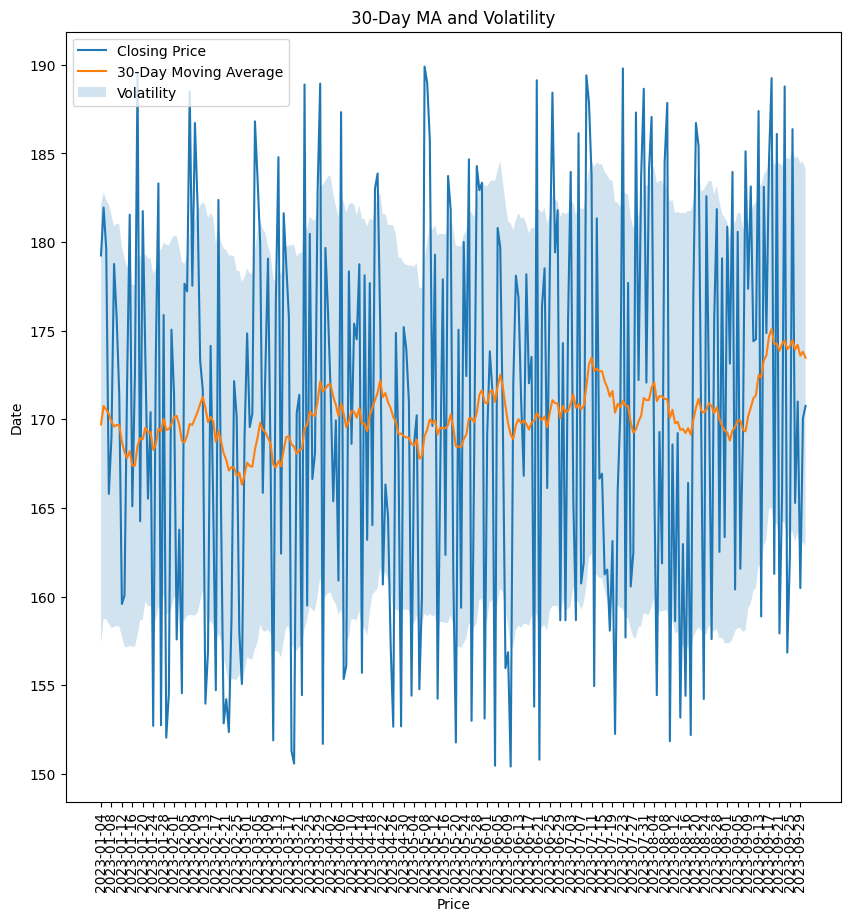

In [10]:
# ---
# Group No. 12
# 1. ภูผา ยอดคีรี 6210450270
# 2. ณัฐนันท์ อุ่นเเจ่ม 6410450010
# 3. สุรเดช เพชรพิเศษศรี 6410450621
# 4. เขมรัตน์ บุณยชาต 6410450362
# ---

group = 12 # อย่าลืมเปลี่ยนเลขกลุ่ม
problem = 1 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".csv"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"-plot"+str(data_num)+".png"

# อ่านข้อมูล
data = pd.read_csv(data_path)

# --- เริ่มเขียนโค้ดตรงนี้ ---

ma = 30 # บอกโปรแกรมว่าจะใช้ moving average เท่าไร่ (สามารถเปลี่ยนค่าได้)

data[f'{ma}MA'] = data['Close'].rolling(window=ma).mean() # คำนวณหาค่า moving average ของ closing price
data['Volatility'] = data['Close'].rolling(window=ma).std() # คำนวณหา volatility ของ closing price
x_labels = data['Date'][ma-1::4] # ตั้งค่าจำนวณของ x label ที่แสดงในกราฟ

plt.figure(figsize=(10, 10)) # ปรับขนาดกราฟ
plt.plot(data['Date'][ma-1:], data['Close'][ma-1:], label='Closing Price') # พล็อต closing price หลังจากจำนวณวันของ ma ที่ตั้งไว้
plt.plot(data['Date'][ma-1:], data[f'{ma}MA'][ma-1:], label=f'{ma}-Day Moving Average') # พล็อต moving average หลังจากจำนวณวันของ ma ที่ตั้งไว้
plt.fill_between(data['Date'][ma-1:], data[f'{ma}MA'][ma-1:]-data['Volatility'][ma-1:], data[f'{ma}MA'][ma-1:]+data['Volatility'][ma-1:], alpha=0.2, label='Volatility') # พล็อต volatility หลังจากจำนวณวันของ ma ที่ตั้งไว้
plt.xticks(x_labels, rotation=90) # ตั้งค่าจำนวณ x label ใหม่ให้ไม่ต้องแสดงทั้งหมด พร้อมกับหมุน x label ไป 90 องศา
plt.title(f'{ma}-Day MA and Volatility') # ชื่อกราฟ
plt.xlabel('Price') # ชื่อแกน x
plt.ylabel('Date') # ชื่อแกน y
plt.legend() # บอกชื่อ label ต่างๆในกราฟ

# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
data.to_csv(result_path, index=False)

# แสดงผลลัพธ์
data.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()
